## Importing necessary libraries

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Library to help with statistical analysis
import scipy.stats as stats 

## Sampling Distribution

**Q1. Suppose an automobile battery manufacturer claims that the mean lifetime of their battery is 60 months with a standard deviation of 6 months. Suppose the distribution of battery life is approximately normal. Find the probability that the mean lifetime of 40 randomly sampled batteries will be less than 58 months.**

In [27]:
# import the required function
from scipy.stats import norm
# declare the value of mean lifetime of battery in mu
mu = 60
# declare the value of standard deviation of battery
sigma = 6
# sample size
n = 40
# find the sample standard deviation
s = sigma/np.sqrt(40)
# find the probability
round(norm.cdf(58, loc = mu, scale = s), 2)     

0.02

Insight:

There is 2% chance that the mean lifetime of 40 randomly sampled batteries will be less than 58 months.

## Interval Estimation

**Q2. A random sample of 40 households was selected as part of a study on electricity usage, and the number of kilowatt-hours (kWh) was recorded for each household in the sample for the first quarter of 2020. The average usage was found to be 310 kWh. In a very large study in the first quarter of the previous year, it was found that the standard deviation of the usage was 89 kWh.**

**Assuming the standard deviation is unchanged and that the usage is normally distributed, provide an expression for calculating a 95% confidence interval for the mean usage in the first quarter of 2019.**

In [6]:
x_bar, sigma = 310, 89
n = 40
np.round(norm.interval(0.95, loc=x_bar, scale=sigma / np.sqrt(n)), 2)

array([282.42, 337.58])

**Insight:**

95% of time,the mean electricity usage i the first quarter will be between 282.42 kwh and 337.58 kwh 

## Hypothesis Testing

**Q3. You are a manager of a Chinese restaurant. You want to determine whether the mean waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. State the null and alternative hypotheses.**

The null hypothesis is that the mean waiting time has not changed from its previous value of 4.5 minutes. This is stated 
as

$$H_0: \mu = 4.5$$

The alternative hypothesis is that the mean waiting time has been changed from its previous value of 4.5 minutes. This is stated as

$$H_a: \mu \neq 4.5$$

**Q4. What is the p-value in a two-tailed z-test for one sample, where the computed test statistic (z-stat) is equal to +2.00?**

For calculating the p-value for a two-tailed hypothesis test, first we will calculate the p-value for a one-tailed test and then multiply the p-value by 2 to obtain the result for a two-tailed test

The p-value for a one-tailed test is the area to the right of the computed test statistic in the distribution of the test statistic. That is, the probability $P(X>z\_stat)$. This can be computed using the `cdf` function.
  * The function `norm.cdf(x, mu, sigma)` calculates the probability $P(X<x)$ or $P(X<=x)$

In [28]:
#import the required function
from scipy.stats import norm
# provided value of the test statistic is +2.00
z_stat = 2
# calculating the p-value for a one-tailed test
p_value = 1 - norm.cdf(2)
p_value

0.02275013194817921

In [13]:
# calculating the p-value for a two-tailed test
print(p_value*2)

0.04550026389635842


**Insight:**
* in a two-tailed z-test for one sample, where the computed test statistic (z-stat) is equal to +2.00, the p-value is 0.0455

**Q5. Samy, Product Manager of K2 Jeans, wants to launch a product line into a new market area. A Survey of a random sample of 400 households in that market showed a mean income per household of 30000 rupees. The standard deviation based on an earlier pilot study of households is 8000 rupees. Samy strongly believes the product line will be adequately profitable only in markets where the mean household income is greater than 29000 rupees. Samy wants our help in deciding whether the product line should be introduced in the new market. Perform statistical analysis and based on that draw a conclusion.**

Assume a level of significance ($\alpha$) of 5%

Null Hypothesis: Mean income of the household is less than or equal to 29000 rupees. This can be written as:

$$H_0: \mu \leq 29000$$ 

Alternative Hypothesis: Mean income of the household is greater than 29000 rupees. This can be written as:

$$H_a: \mu > 29000$$ 

From the description in the question, we are provided:

$\bar{x} = 30000$

$\mu = 29000$

$\sigma = 8000$

$n = 400$

The formula for computing the test statistic (z-stat) is given as:

<font size = 5> $z = \frac{(\bar{x}-\mu)}{\sigma/\sqrt{n}}$ </font>

# P_Value Approach

In [29]:
# calculating the test statistic (z-stat)
z = (30000 - 29000)/(8000/np.sqrt(400))
print(z)

2.5


As the alternative hypothesis contains $>$ sign, it is a one-tailed test of greater than type. So, the p-value will be the area to the right of the computed test statistic in the distribution of the test statistic. That is, the probability $P(X>z)$

In [31]:
# Calculating the p-value for the test statistic z = 2.5
p_value = 1 - stats.norm.cdf(z)
p_value

0.006209665325776159

**Insight**

* As the p-value is less than $\alpha$ (=0.05), we have enough evidence to reject the null hypothesis. 

* Hence, we have enough evidence to conclude that the mean income of the household is greater than 29000 rupees

# Rejection Region Approach

For this approach, we need to follow the below steps.


1.   We choose a value of level of significance ($\alpha$).

     ($\alpha$ is the probability of rejecting the null hypothesis if it is true.)

2.   Then, we find the rejection region in the graph.

3.   We reject the null hypothesis if the test statistic falls in the rejection region. Else, we don't reject the null hypothesis.

In the given example, the Z test statistic follows a standard normal distribution as shown in the below plot. The Z values lying in the right end of the distribution gives strong evidence against the null hypothesis. To find the rejection region, we will find the value of Z (called critical value) that gives an area of $\alpha$ to the right end.

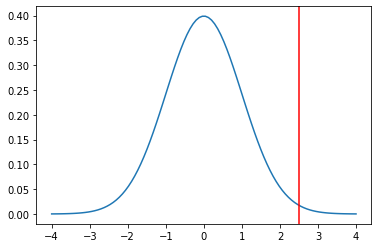

In [32]:
# import the required function
from scipy.stats import norm

# plotting the distribution of Z test statistic along with the computed test statistic
# We are plotting the distributions here to better visualize the calculations
x = np.linspace(-4, 4, 100) # create an array of 100 numbers starting from -4 and ending at 4
plt.plot(x, norm.pdf(x, 0, 1)) # plot the pdf of the normal distribution
plt.axvline(x = z, c = 'r') # draw a vertical red line through the mentioned point
plt.show() # display the plot

In [33]:
# import the required function
from scipy.stats import norm

# find the critical value
critical_value = norm.ppf(1-.05)
critical_value

1.6448536269514722

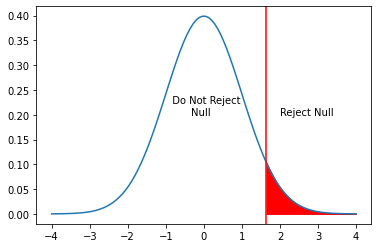

In [34]:
# plotting the test statistic distribution and indicating the rejection and acceptance region
# We are plotting the distributions here to better visualize the calculations
x = np.linspace(-4, 4, 100) # create an array of 100 numbers starting from -4 and ending at 4
plt.plot(x, norm.pdf(x, 0, 1)) # plot the pdf of the normal distribution
plt.axvline(x = critical_value, c = 'r') # draw a vertical red line through the mentioned point
x1 = np.linspace(critical_value, 4, 50) # create an array of 50 numbers starting from the critical value and ending at 4
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r') # fill the area under the curve after the critical value with red color
plt.annotate('Reject Null', (2, 0.20)) # annotate the mentioned text at the mentioned location
plt.annotate('  Do Not Reject\n        Null', (-1, 0.20)) # annotate the mentioned text at the mentioned location
plt.show() # display the plot

### Insight

As our test statistic (~ 2.5) does lie in the rejection region, we can reject the null hypothesis. Thus, we have statistical evidence to say that the Mean income of the household is greater than 29,000 rupees.